## Merging dataframes

In [34]:
import pandas as pd


In [35]:
# Load the cleaned news data and the weather data
news_df = pd.read_csv('News_data.csv')
weather_df = pd.read_csv('Weather_data.csv')

In [36]:
news_df

,month,article count
0,2011-01,49
1,2011-02,53
2,2011-03,37
3,2011-04,44
4,2011-05,52
...,...,...
147,2023-04,68
148,2023-05,82
149,2023-06,71
150,2023-07,66


In [37]:
weather_df

,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp anomaly,mean daily max temp anomaly,mean daily min temp anomaly,mean wind speed anomaly,accumulated precipitation anomaly
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4


In [38]:
# Merge the news data (article_df) with the weather data (weather_df) on the 'month' column
merged_df = weather_df.merge(news_df, on='month', how='left')

# Fill any NaN values in 'article count' column with 0 and convert to integer
merged_df['article count'] = merged_df['article count'].fillna(0).astype(int)


merged_df.to_csv('Final_data.csv', index=False)
merged_df



,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp anomaly,mean daily max temp anomaly,mean daily min temp anomaly,mean wind speed anomaly,accumulated precipitation anomaly,article count
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5,49
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7,53
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5,37
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5,44
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2,52
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5,59
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9,68
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1,82
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4,71


## Visualization

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

Correlation between mean temp anomaly and article count: 0.17
Correlation between mean daily max temp anomaly and article count: 0.13
Correlation between mean daily min temp anomaly and article count: 0.18
Correlation between mean wind speed anomaly and article count: 0.02
Correlation between accumulated precipitation anomaly and article count: 0.10


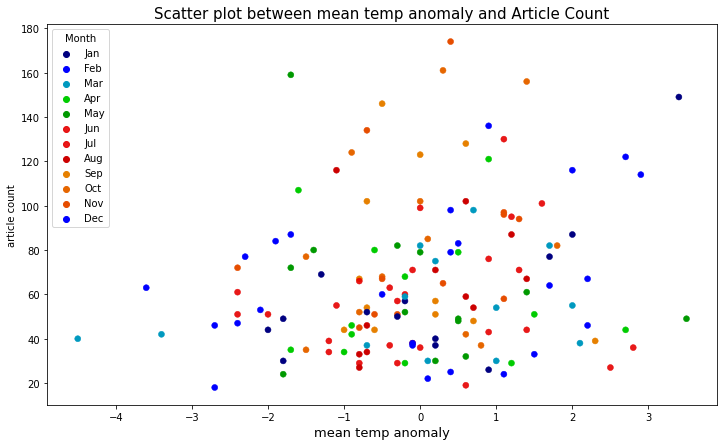

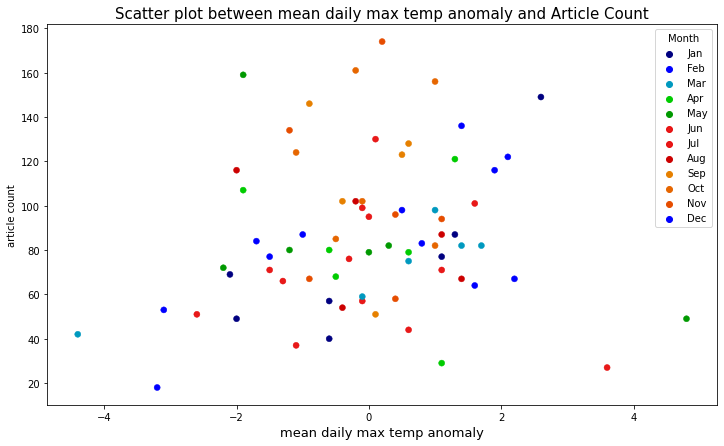

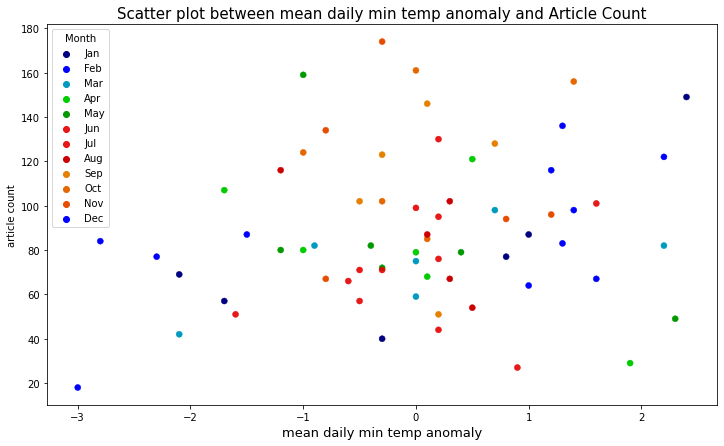

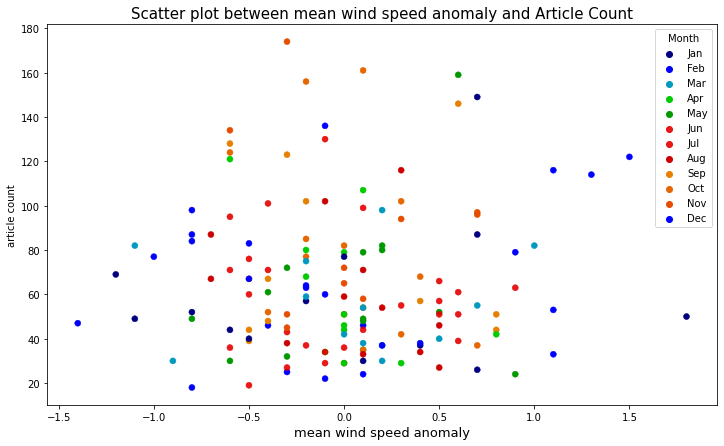

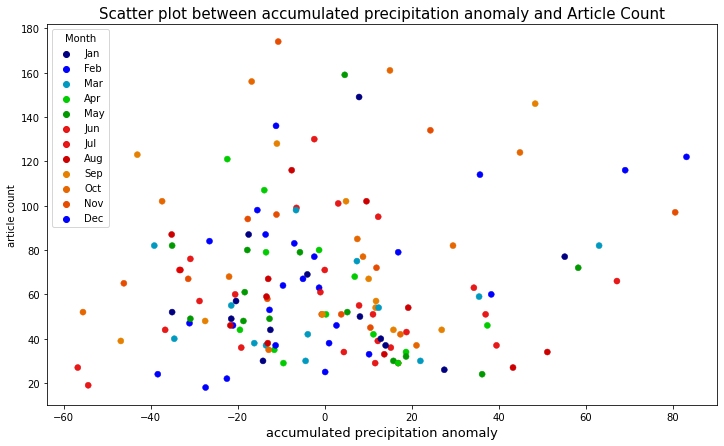

In [40]:
# Create a 'month_num' column to extract month from the 'month' column
merged_df['month_num'] = merged_df['month'].str.split('-').str[1]

# Define colors for each month:
months_colors = {
    "01": (0, 0, 0.5, 1),     # Dark blue
    "02": (0, 0, 1, 1),   # Medium blue
    "03": (0, 0.6, 0.75, 1), # Light blue
    "04": (0, 0.8, 0, 1),    # Light green
    "05": (0, 0.6, 0, 1),    # Medium green
    "06": (0.9, 0, 0, 0.9),  # Transparent red
    "07": (0.9, 0, 0, 0.9),  # Transparent red
    "08": (0.8, 0, 0, 1),    # Medium red
    "09": (0.9, 0.5, 0, 1),  # Light orange
    "10": (0.9, 0.4, 0, 1),  # Medium orange
    "11": (0.9, 0.3, 0, 1),  # Dark orange
    "12": (0, 0, 1, 1)    # Darkest blue
}

# List of columns for which correlation with 'article count' will be computed
columns_to_correlate = [ 
    'mean temp anomaly', 'mean daily max temp anomaly', 
    'mean daily min temp anomaly', 'mean wind speed anomaly', 
    'accumulated precipitation anomaly'
]

# Compute and print the correlation
for column in columns_to_correlate:
    correlation = merged_df[column].corr(merged_df['article count'])
    print(f"Correlation between {column} and article count: {correlation:.2f}")
    
    # Plot scatter plot for each correlation using seaborn
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=merged_df, x=column, y='article count', hue='month_num', palette=months_colors, edgecolor=None, legend="brief")
    
    # Provide a custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [calendar.month_abbr[int(label)] if label.isdigit() else label for label in labels]
    plt.legend(handles=handles, labels=labels, title="Month")
    
    plt.title(f'Scatter plot between {column} and Article Count', fontsize=15)
    plt.xlabel(column, fontsize=13)

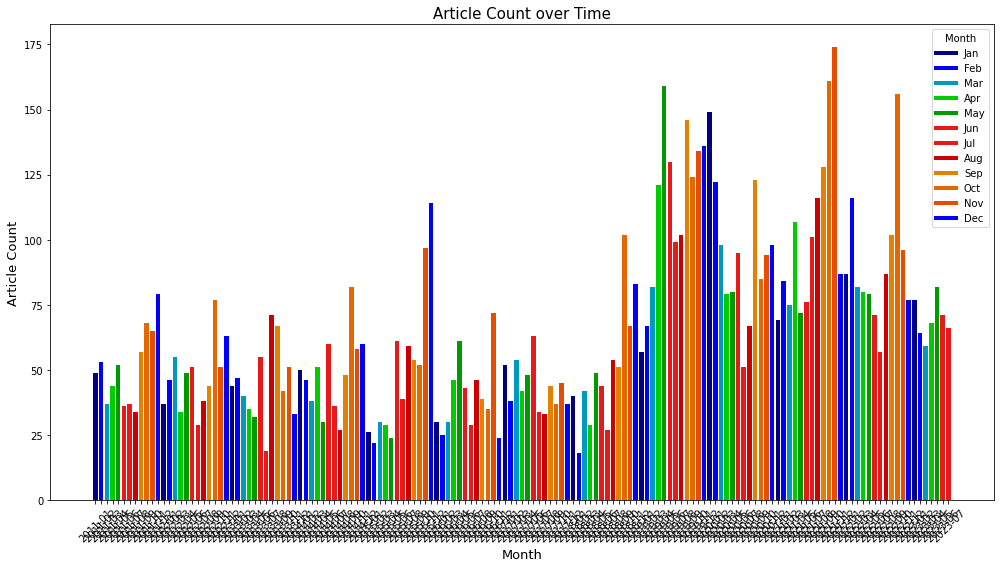

In [41]:
# Create a 'month_num' column to extract month from the 'month' column
merged_df['month_num'] = merged_df['month'].str.split('-').str[1]

# Plot bar plot of 'article count' vs 'month' using matplotlib
plt.figure(figsize=(14, 8))
bars = plt.bar(np.arange(len(merged_df)), merged_df['article count'], color=merged_df['month_num'].map(months_colors))

# Set x-ticks to month values
plt.xticks(np.arange(len(merged_df)), merged_df['month'].values, rotation=45)

# Create a custom legend using colors and labels
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=calendar.month_abbr[int(month)]) for month, color in months_colors.items()]
plt.legend(handles=legend_elements, title="Month")

plt.title('Article Count over Time', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Article Count', fontsize=13)
plt.tight_layout()
plt.show()

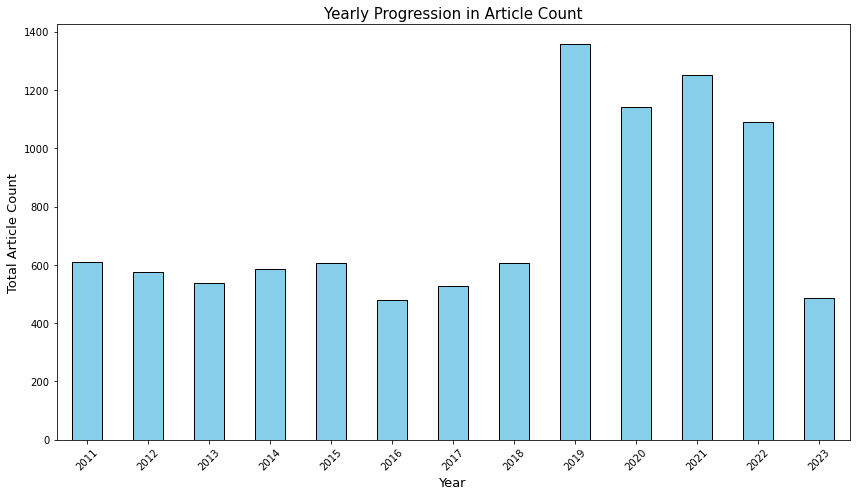

In [42]:
# Extract year from 'month' column
merged_df['year'] = merged_df['month'].str.split('-').str[0]

# Group by year and sum the article counts
yearly_counts = merged_df.groupby('year')['article count'].sum()

# Plot the aggregated data
plt.figure(figsize=(12, 7))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Yearly Progression in Article Count', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Article Count', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [43]:
# Read the CSV file
df_news_testing = pd.read_csv('News_testing.csv')

# Display the dataframe
df_news_testing

,Term,Date,Headline,Category,month,article count
0,havstigninger,2011-01-02,Husejere vil kende klima-risiko,Bolig,2011-01,49
1,havstigninger,2011-01-03,Klar besked om klimarisiko,JP Erhverv,2011-01,49
2,klimaforandringer,2011-01-03,295.000 dræbt af naturen i 2010,International,2011-01,49
3,CO2-udledning,2011-01-04,Danmarks grønne industri visner,JP Erhverv,2011-01,49
4,klimaforandringer,2011-01-04,Kinas ørkner vil bestå i 300 år,Viden,2011-01,49
...,...,...,...,...,...,...
9883,CO2-mål,2023-08-13,"Kina er i gang med et megaprojekt, og det bliv...",Asien,2023-08,36
9884,CO2-udledning,2023-08-13,Ambitiøse klimamål er ikke nok – der er også b...,Debatindlæg,2023-08,36
9885,klimakrisen,2023-08-14,Ophæv forbuddet mod atomkraft,Debatindlæg,2023-08,36
9886,klimakrisen,2023-08-14,"Her bestemmer børnene selv, hvornår de møder",JP Aarhus,2023-08,36


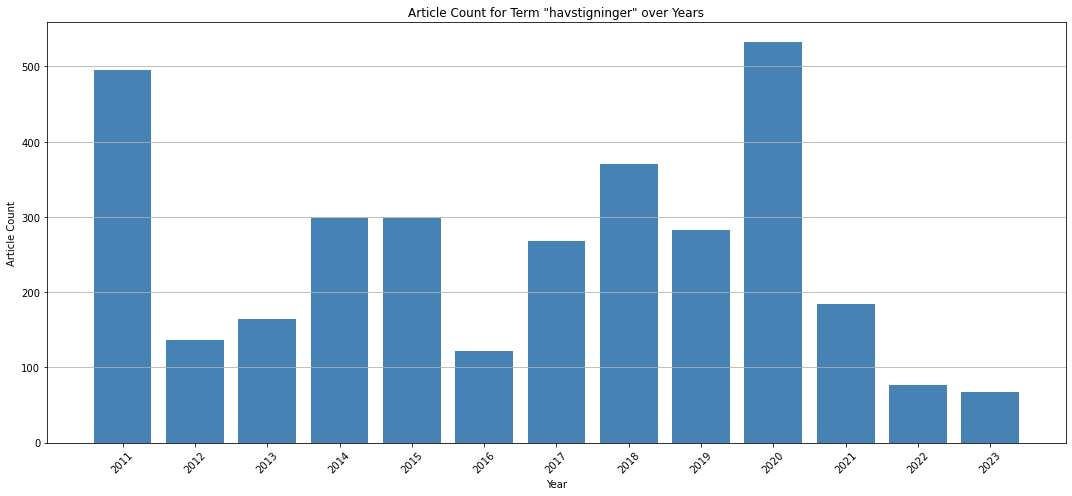

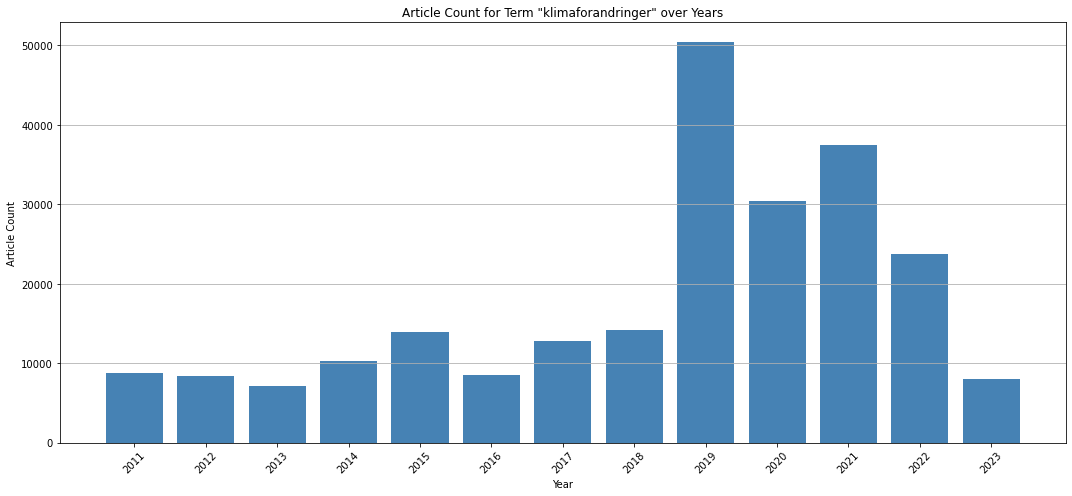

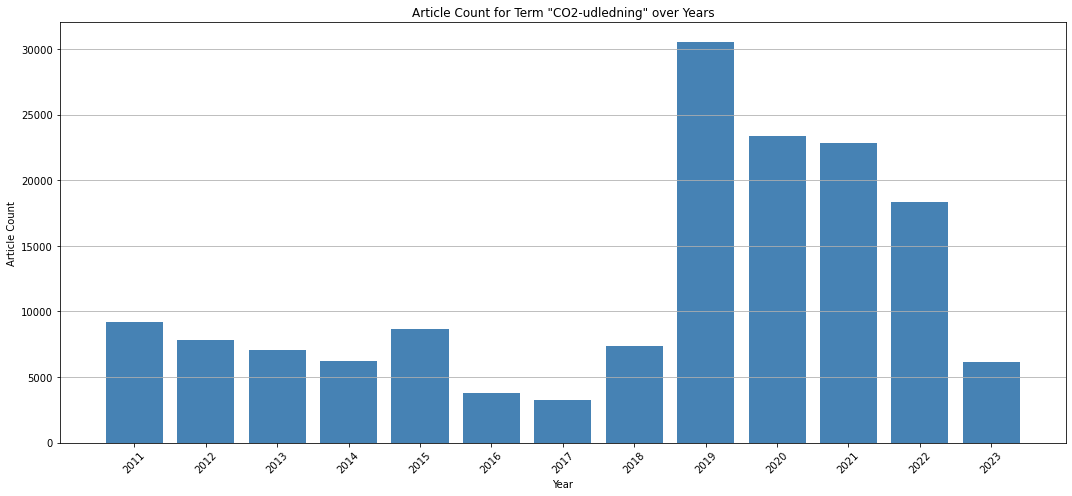

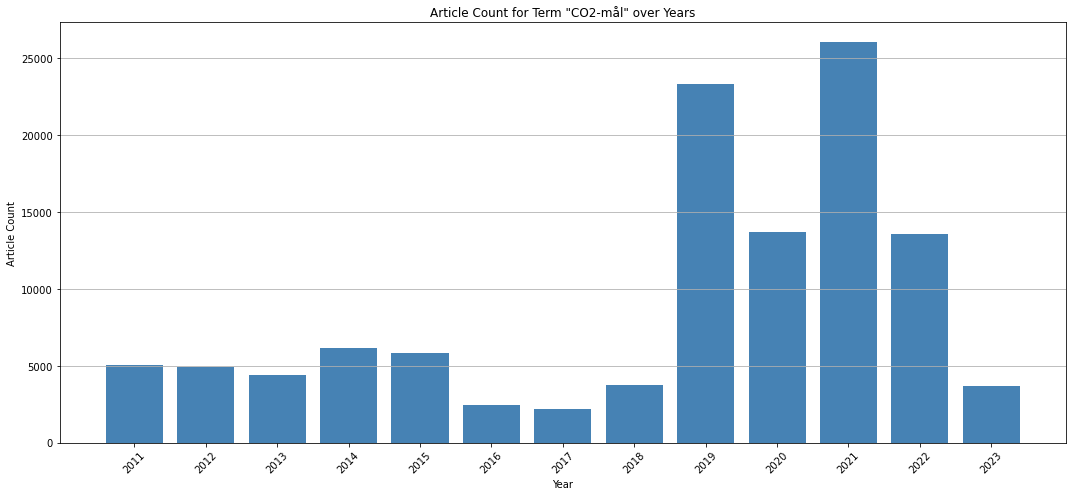

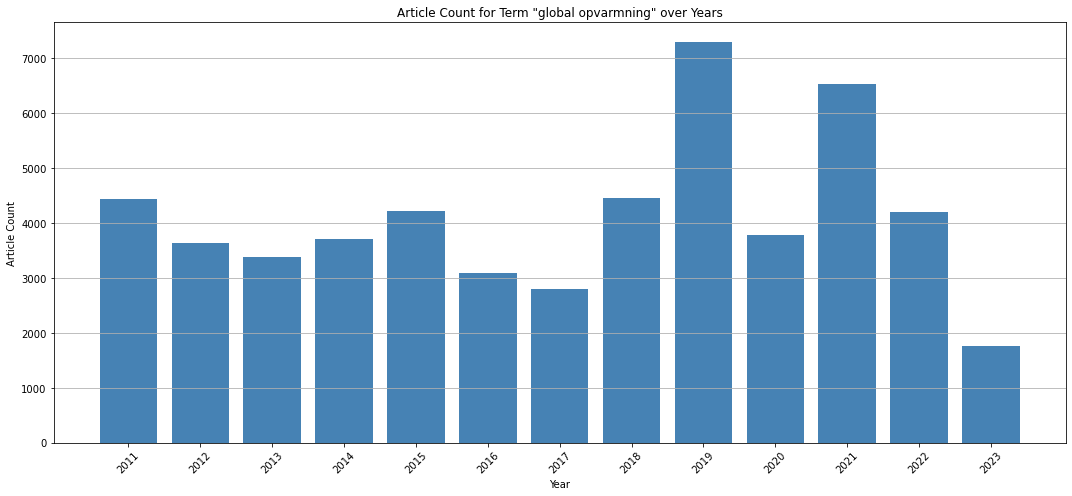

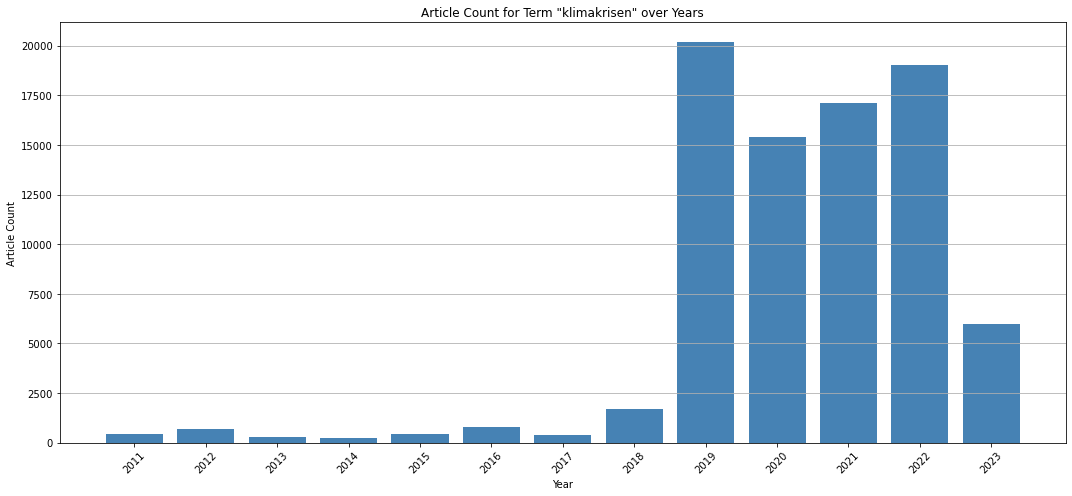

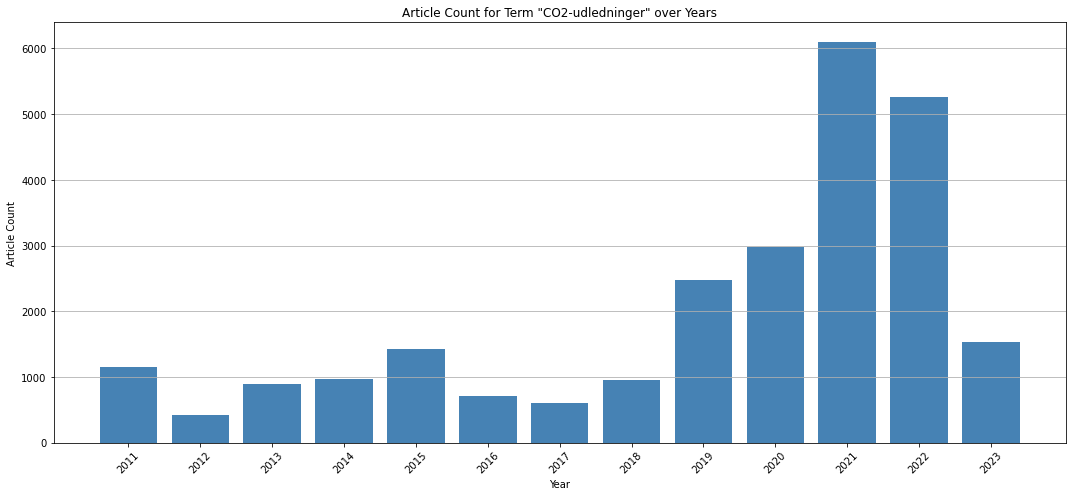

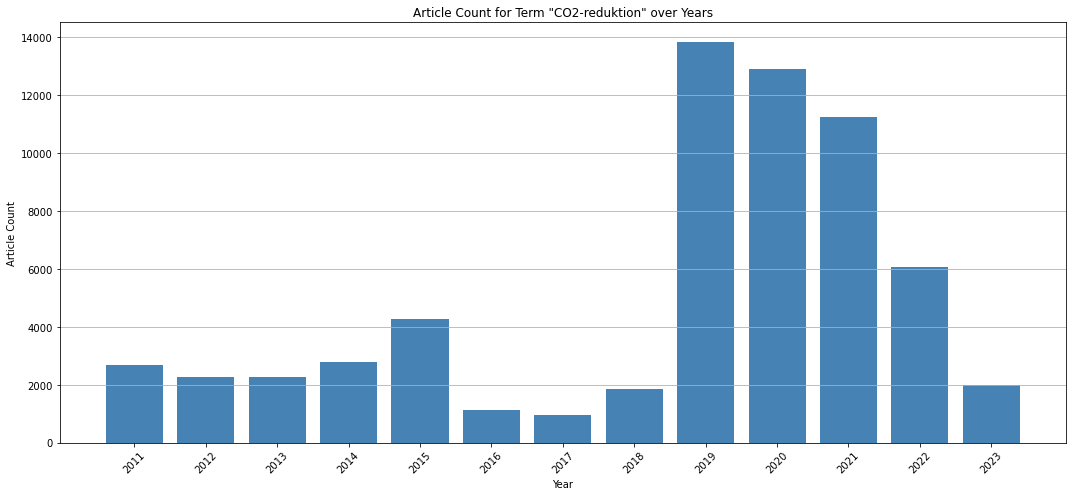

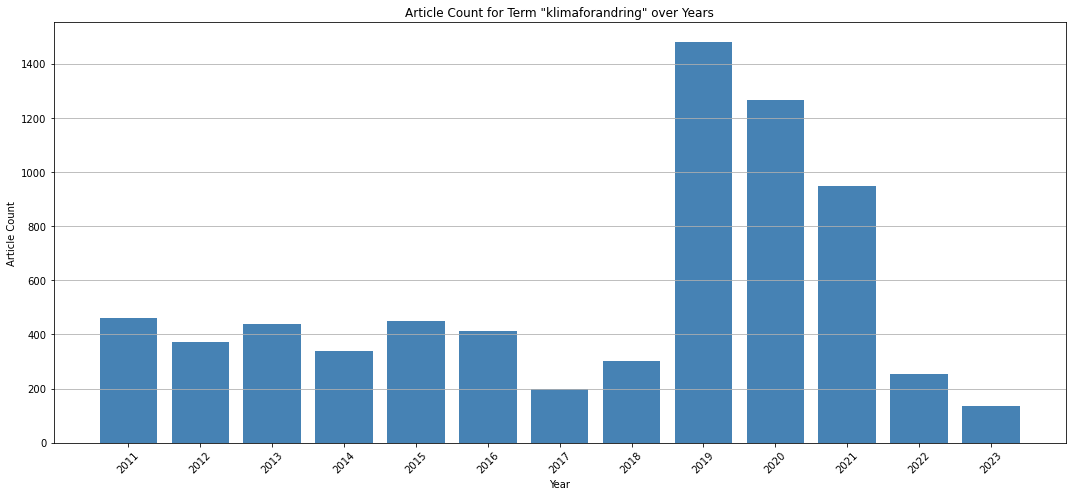

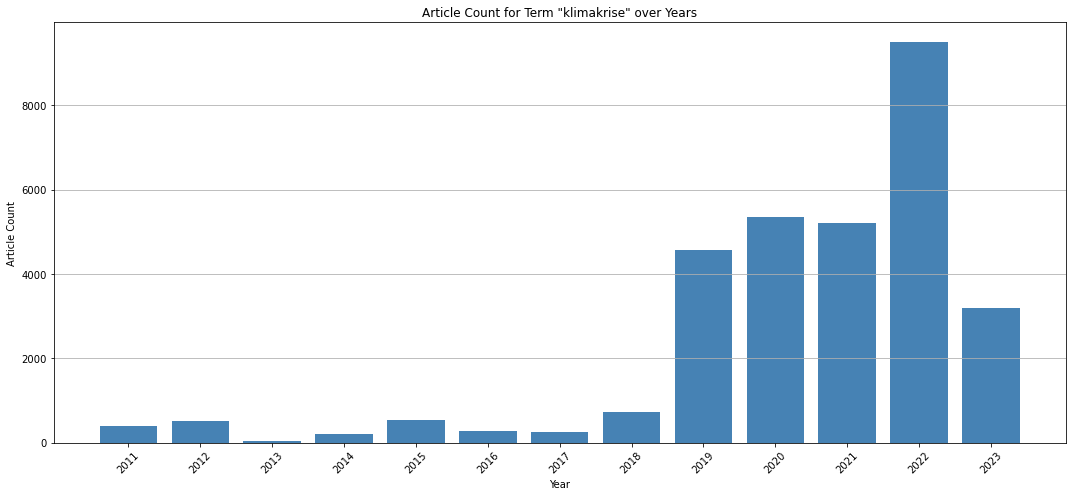

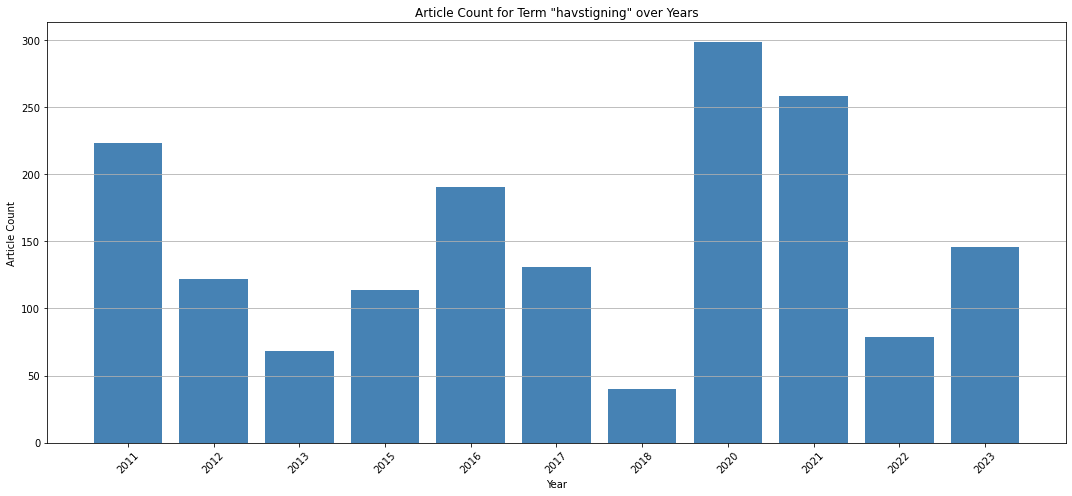

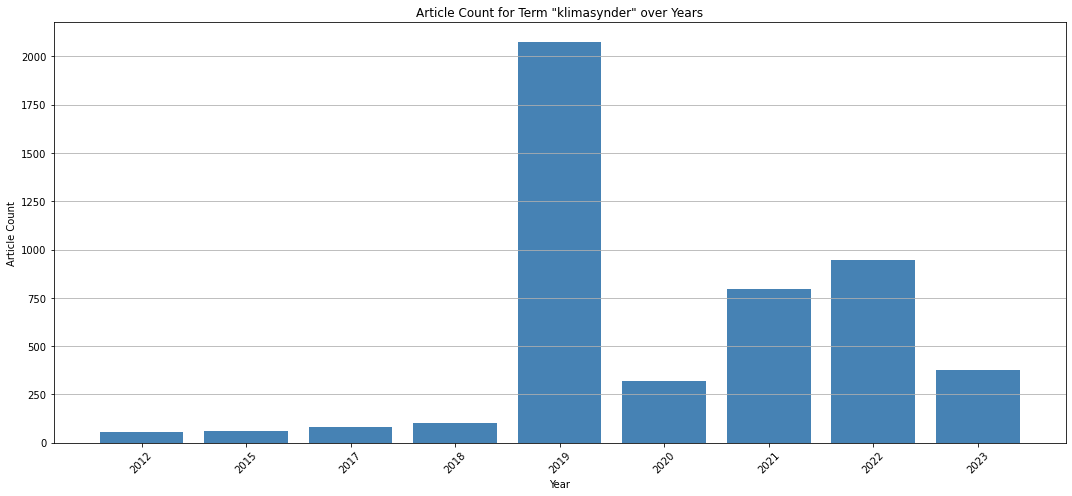

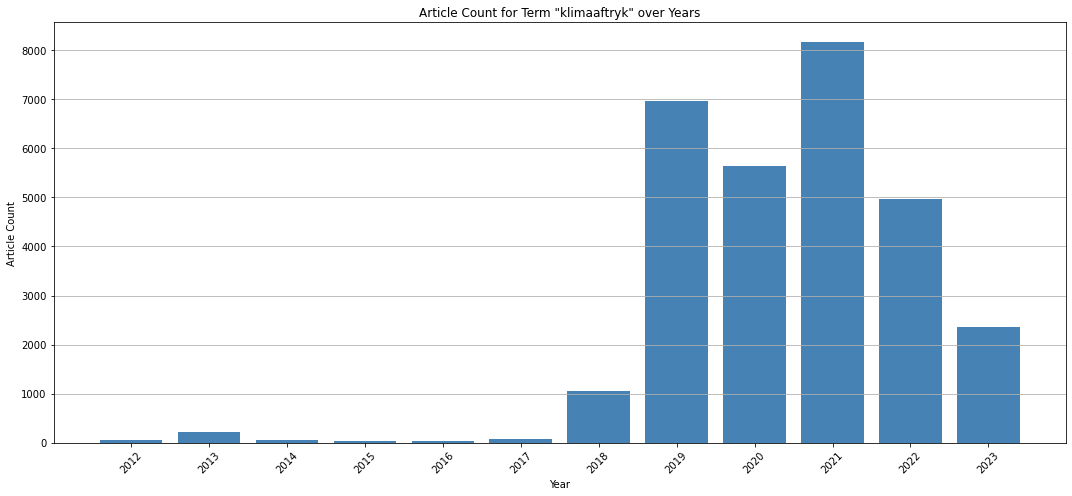

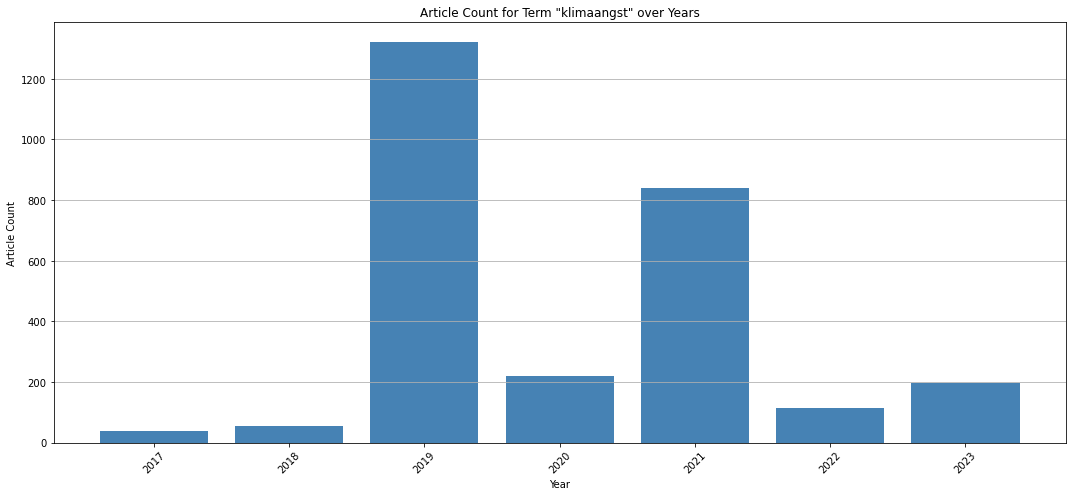

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from the month column
df_news_testing['year'] = df_news_testing['month'].str[:4]

unique_terms = df_news_testing['Term'].unique()

# Create a plot for each Term
for term in unique_terms:
    # Filter dataframe for the current term
    term_df = df_news_testing[df_news_testing['Term'] == term]
    
    # Group by year and sum the article count
    yearly_counts = term_df.groupby('year')['article count'].sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 7))
    plt.bar(yearly_counts['year'], yearly_counts['article count'], color='steelblue')
    plt.xlabel('Year')
    plt.ylabel('Article Count')
    plt.title(f'Article Count for Term "{term}" over Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [45]:
bla = pd.read_csv('jyllands_posten_data.csv')
bla

,Term,Date,Headline,Category
0,havstigninger,2011-01-02,Husejere vil kende klima-risiko,Bolig
1,havstigninger,2011-01-03,Klar besked om klimarisiko,JP Erhverv
2,klimaforandringer,2011-01-03,295.000 dræbt af naturen i 2010,International
3,CO2-udledning,2011-01-04,Danmarks grønne industri visner,JP Erhverv
4,klimaforandringer,2011-01-04,Kinas ørkner vil bestå i 300 år,Viden
...,...,...,...,...
14224,CO2-mål,2023-08-13,"Kina er i gang med et megaprojekt, og det bliv...",Asien
14225,CO2-udledning,2023-08-13,Ambitiøse klimamål er ikke nok – der er også b...,Debatindlæg
14226,klimakrisen,2023-08-14,Ophæv forbuddet mod atomkraft,Debatindlæg
14227,klimakrisen,2023-08-14,"Her bestemmer børnene selv, hvornår de møder",JP Aarhus


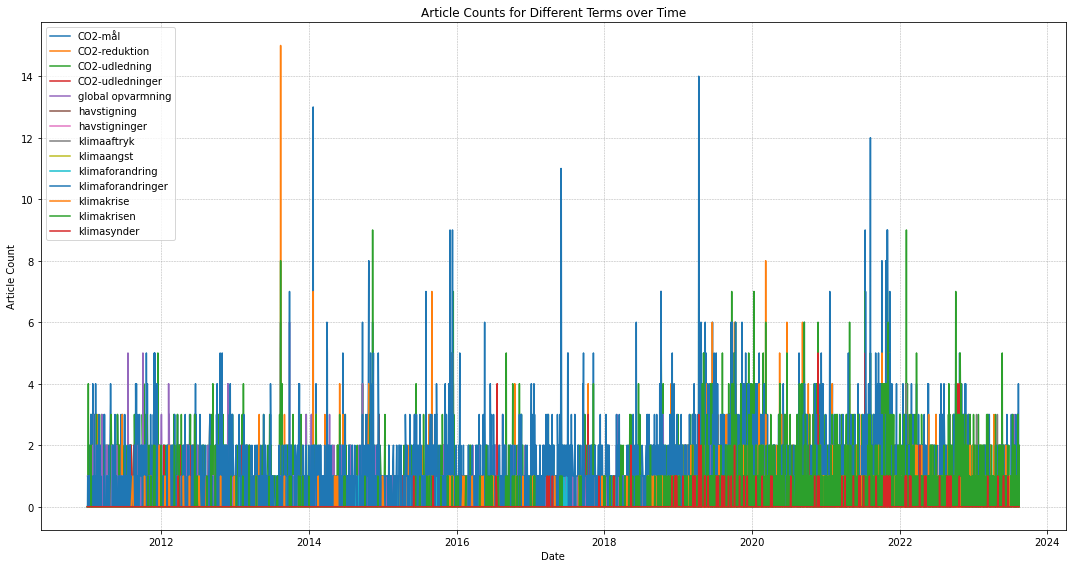

In [46]:
# Convert the Date column to a pandas datetime format
bla['Date'] = pd.to_datetime(bla['Date'])

# Group by the Date and Term columns to count the occurrences of each term on each date
term_counts = bla.groupby(['Date', 'Term']).size().reset_index(name='Counts')

# Pivot the data so each term has its own column with dates as the index
pivoted_data = term_counts.pivot(index='Date', columns='Term', values='Counts').fillna(0)

# Plot the data
plt.figure(figsize=(15, 8))

for term in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[term], label=term)

plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Article Counts for Different Terms over Time')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

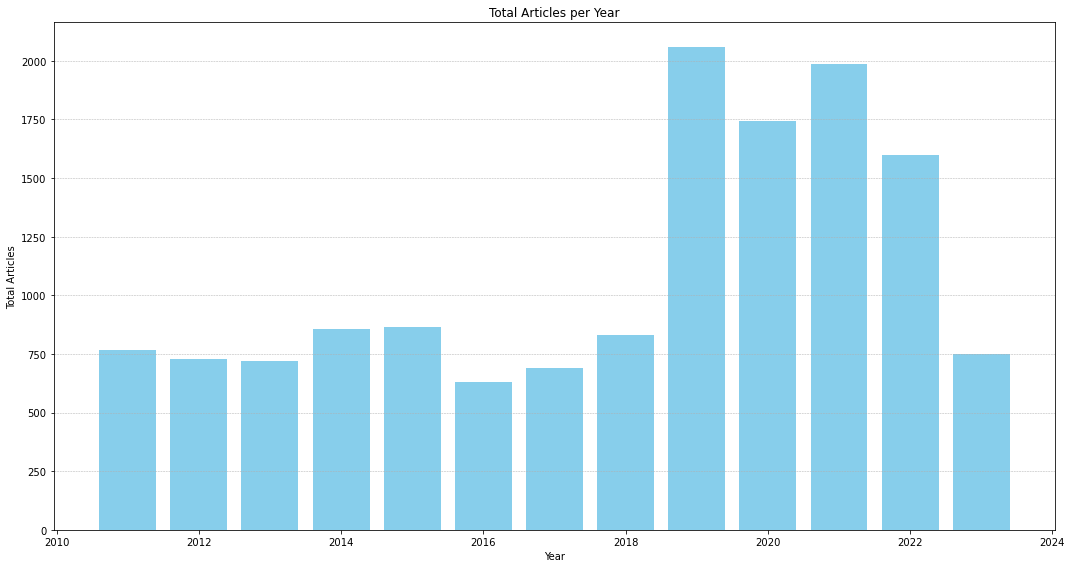

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Date column to a pandas datetime format
bla['Date'] = pd.to_datetime(bla['Date'])

# Extract year from Date column
bla['Year'] = bla['Date'].dt.year

# Group by year and count the total articles
yearly_counts = bla.groupby('Year').size().reset_index(name='Article Count')

# Plot the aggregated data
plt.figure(figsize=(15, 8))
plt.bar(yearly_counts['Year'], yearly_counts['Article Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Articles')
plt.title('Total Articles per Year')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## OLS

In [48]:
import statsmodels.api as sm

# Assuming you already have merged_df loaded

# Create squared anomaly variables
merged_df['mean temp anomaly squared'] = merged_df['mean temp anomaly'] ** 2
merged_df['mean wind speed anomaly squared'] = merged_df['mean wind speed anomaly'] ** 2
merged_df['accumulated precipitation anomaly squared'] = merged_df['accumulated precipitation anomaly'] ** 2

# Independent Variables (only squared terms)
X = merged_df[['mean temp anomaly squared',
               'mean wind speed anomaly squared',
               'accumulated precipitation anomaly squared']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable
y = merged_df['article count']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8130
Date:                Sat, 19 Aug 2023   Prob (F-statistic):              0.489
Time:                        14:41:47   Log-Likelihood:                -741.32
No. Observations:                 151   AIC:                             1491.
Df Residuals:                     147   BIC:                             1503.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [49]:
# Convert 'year' column to integers
merged_df['year'] = merged_df['year'].astype(int)

# Split the dataset
before_2019 = merged_df[merged_df['year'] < 2019]
after_2019 = merged_df[merged_df['year'] >= 2019]

# Model for the entire period
X_full = sm.add_constant(merged_df[['mean temp anomaly squared',
                                   'mean wind speed anomaly squared',
                                   'accumulated precipitation anomaly squared']])
y_full = merged_df['article count']
model_full = sm.OLS(y_full, X_full).fit()
SSR_full = model_full.ssr

# Model for before 2019
X_before = sm.add_constant(before_2019[['mean temp anomaly squared',
                                        'mean wind speed anomaly squared',
                                        'accumulated precipitation anomaly squared']])
y_before = before_2019['article count']
model_before = sm.OLS(y_before, X_before).fit()
SSR1 = model_before.ssr

# Model for after 2019
X_after = sm.add_constant(after_2019[['mean temp anomaly squared',
                                      'mean wind speed anomaly squared',
                                      'accumulated precipitation anomaly squared']])
y_after = after_2019['article count']
model_after = sm.OLS(y_after, X_after).fit()
SSR2 = model_after.ssr

# Compute the Chow test statistic
k = len(X_full.columns)
n = len(merged_df)
F = ((SSR_full - (SSR1 + SSR2)) / k) / ((SSR1 + SSR2) / (n - 2*k))

print("Chow Test Statistic:", F)


Chow Test Statistic: 39.61643789349003


In [50]:
from scipy.stats import f

alpha = 0.05  # significance level
df1 = k  # numerator degrees of freedom
df2 = n - 2*k  # denominator degrees of freedom

f_critical = f.ppf(1 - alpha, df1, df2)
print(f"Critical value at alpha={alpha}: {f_critical}")


Critical value at alpha=0.05: 2.434946889792458


In [55]:
import statsmodels.api as sm # for OLS regression
import pandas as pd # for data manipulation
from stargazer.stargazer import Stargazer # for regression table

# Assuming you already have merged_df loaded

# Convert 'year' column to integers (if not already)
merged_df['year'] = merged_df['year'].astype(int)

# Create the 'post_2019' dummy variable
merged_df['post_2019'] = (merged_df['year'] >= 2019).astype(int)

# Create squared anomaly variables
merged_df['temp_anomaly_squared'] = merged_df['mean temp anomaly'] ** 2
merged_df['wind_speed_anomaly_squared'] = merged_df['mean wind speed anomaly'] ** 2
merged_df['precip_anomaly_squared'] = merged_df['accumulated precipitation anomaly'] ** 2

# Create interaction terms
merged_df['temp_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['temp_anomaly_squared']
merged_df['wind_speed_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['wind_speed_anomaly_squared']
merged_df['precip_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['precip_anomaly_squared']

# Independent Variables: squared terms and interactions
X = merged_df[['temp_anomaly_squared', 'wind_speed_anomaly_squared', 'precip_anomaly_squared',
               'temp_anomaly_squared_post2019', 'wind_speed_anomaly_squared_post2019', 'precip_anomaly_squared_post2019']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable
y = merged_df['article count']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     7.893
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.31e-07
Time:                        14:45:44   Log-Likelihood:                -721.10
No. Observations:                 151   AIC:                             1456.
Df Residuals:                     144   BIC:                             1477.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [52]:


# Convert 'year' column to integers (if not already)
merged_df['year'] = merged_df['year'].astype(int)

# Create the 'pre_2019' and 'post_2019' dummy variables
merged_df['pre_2019'] = (merged_df['year'] < 2019).astype(int)
merged_df['post_2019'] = (merged_df['year'] >= 2019).astype(int)

# Create squared anomaly variables
merged_df['temp_anomaly_squared'] = merged_df['mean temp anomaly'] ** 2
merged_df['wind_speed_anomaly_squared'] = merged_df['mean wind speed anomaly'] ** 2
merged_df['precip_anomaly_squared'] = merged_df['accumulated precipitation anomaly'] ** 2

# Create interaction terms for before and after 2019
merged_df['temp_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['temp_anomaly_squared']
merged_df['wind_speed_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['wind_speed_anomaly_squared']
merged_df['precip_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['precip_anomaly_squared']

merged_df['temp_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['temp_anomaly_squared']
merged_df['wind_speed_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['wind_speed_anomaly_squared']
merged_df['precip_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['precip_anomaly_squared']

# Independent Variables: interaction terms
X = merged_df[['temp_anomaly_squared_pre2019', 'wind_speed_anomaly_squared_pre2019', 'precip_anomaly_squared_pre2019',
               'temp_anomaly_squared_post2019', 'wind_speed_anomaly_squared_post2019', 'precip_anomaly_squared_post2019']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable
y = merged_df['article count']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          article count   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     7.893
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           2.31e-07
Time:                        14:41:47   Log-Likelihood:                -721.10
No. Observations:                 151   AIC:                             1456.
Df Residuals:                     144   BIC:                             1477.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [59]:
import statsmodels.api as sm
import pandas as pd
from stargazer.stargazer import Stargazer

# Assuming merged_df is already loaded...

# Convert 'year' column to integers (if not already)
merged_df['year'] = merged_df['year'].astype(int)

# Create the 'pre_2019' and 'post_2019' dummy variables
merged_df['pre_2019'] = (merged_df['year'] < 2019).astype(int)
merged_df['post_2019'] = (merged_df['year'] >= 2019).astype(int)

# Create squared anomaly variables
merged_df['temp_anomaly_squared'] = merged_df['mean temp anomaly'] ** 2
merged_df['wind_speed_anomaly_squared'] = merged_df['mean wind speed anomaly'] ** 2
merged_df['precip_anomaly_squared'] = merged_df['accumulated precipitation anomaly'] ** 2

# Create interaction terms for before and after 2019
merged_df['temp_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['temp_anomaly_squared']
merged_df['wind_speed_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['wind_speed_anomaly_squared']
merged_df['precip_anomaly_squared_pre2019'] = merged_df['pre_2019'] * merged_df['precip_anomaly_squared']

merged_df['temp_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['temp_anomaly_squared']
merged_df['wind_speed_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['wind_speed_anomaly_squared']
merged_df['precip_anomaly_squared_post2019'] = merged_df['post_2019'] * merged_df['precip_anomaly_squared']

# Independent Variables: interaction terms
X = merged_df[['temp_anomaly_squared_pre2019', 'wind_speed_anomaly_squared_pre2019', 'precip_anomaly_squared_pre2019',
               'temp_anomaly_squared_post2019', 'wind_speed_anomaly_squared_post2019', 'precip_anomaly_squared_post2019']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable
y = merged_df['article count']

# Fit the OLS model
model = sm.OLS(y, X).fit()


In [62]:
# Use stargazer to convert regression output to LaTeX table format
stargazer = Stargazer([model])
stargazer.custom_columns(['Model 1'], [1])
stargazer.significant_digits(5)
stargazer.title("Regression Results of Article Count on Anomaly Variables")
stargazer.covariate_order(X.columns.to_list())

latex_code = stargazer.render_latex()
print(latex_code)


\begin{table}[!htbp] \centering
  \caption{Regression Results of Article Count on Anomaly Variables}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: article count}} \
\cr \cline{2-2}
\\[-1.8ex] & \multicolumn{1}{c}{Model 1}  \\
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 const & 63.85861$^{***}$ \\
& (3.40644) \\
 temp_anomaly_squared_pre2019 & -1.46388$^{*}$ \\
& (0.86936) \\
 wind_speed_anomaly_squared_pre2019 & -5.66327$^{}$ \\
& (6.21120) \\
 precip_anomaly_squared_pre2019 & -0.00365$^{}$ \\
& (0.00309) \\
 temp_anomaly_squared_post2019 & 6.23290$^{***}$ \\
& (2.05829) \\
 wind_speed_anomaly_squared_post2019 & 9.99965$^{}$ \\
& (11.92982) \\
 precip_anomaly_squared_post2019 & 0.00303$^{}$ \\
& (0.00327) \\
\hline \\[-1.8ex]
 Observations & 151 \\
 $R^2$ & 0.24748 \\
 Adjusted $R^2$ & 0.21612 \\
 Residual Std. Error & 29.37928 (df=144) \\
 F Statistic & 7.89276$^{***}$ (df=6; 144) \\
\hline
\hline \\[-1.8ex]
\tex